# Forecats Outbreak Size in Wuhan after City shut down

#### Author: Yiran JIng
#### Date: Feb 2 2020

#### Data source:
Chinese Center for Disease Control and Prevention (DOC) report from 8 Dec 2019 to Feb 2 2020.

### SIR epidemic model

- S for the number susceptible,指未得病者，但缺乏免疫能力，与感病者接触后容易受到感染。
- I for the number of infectious
- R for the number removed: 移除人群是因病愈(具有免疫力)或死亡而不再参与感染和 被感染过程的人
- N the constancy of population
- β the effective `contact rate` of the disease: an infected individual comes into contact with βN other individuals per unit time
- γ  is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on. i.e. the transition rate between I and R. If the mean duration of the infection is denoted D, then γ = 1/D
- βI: transition rate between S and I

It's assumed that the permanence of each single subject in the epidemic states is a random variable with exponential distribution. 

S(t)+I(t)+R(t)=N (consistent) # t is time 

### SEIR model

In the SEIR model [1], during the course of an epidemics, a node is allowed to change its status from Susceptible (S) to Exposed (E) to Infected (I), then to Removed (R).

SEIR assumes that if, during a generic iteration, a susceptible node comes into contact with an infected one, it becomes infected after an exposition period with probability beta, than it can switch to removed with probability gamma (the only transition allowed are S→E→I→R).



In [1]:
import numpy as np
import pandas as pd
import pandas
from SIER_model import SIER
from SIR_model import SIR
from matplotlib import pyplot as plt
from helper_fun_epi_model import *
import scipy.optimize as optimization
import warnings
warnings.filterwarnings('ignore')

## 2019-nCoV case
### Estimate parameters of Baseline:
1. mu = 1/14, (suppose the mean duration of the infection is 14 days)
1. S0 = N = 11000000, I0 = 1, R0 = 0
   - In the initial status, suppose **N ≈ S** (i.e. all the people in are uninfected, expect one infected case, no people die or recovered)
1. T = 7: The mean of incubation period is 7 days

### Assumption:
1. before 23 Jan, Suppose the mean of the number of people a confirmed case contacts daily is 5. (K = 5) (low conscuousness of wearing facial mask)
2. after 23 Jan, k = 1 (high conscuousness of 2019-nCoV)
3. The healed people will not be infective again. 

In [2]:
"""
Data from Chinese Center for Disease Control and Prevention (DOC) 
"""
# 2019-12-08 is the first date, when find the first case. 
t = np.asarray([0, 42, 43, 44, 45, 46])  # time
I = np.asarray([1,198,218,320,478,639]) # number of official confirmed cases

Est = Estimate_parameter(nu = 1/14, k = 5, t = t, I = I)
print(Est)


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9



### SEIR without vital dynamics
#### Before 23 Jan 
- population in Wuhan is 11000000
- people have low conscuousness of wearing facial mask, so k = 5

Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  2107865


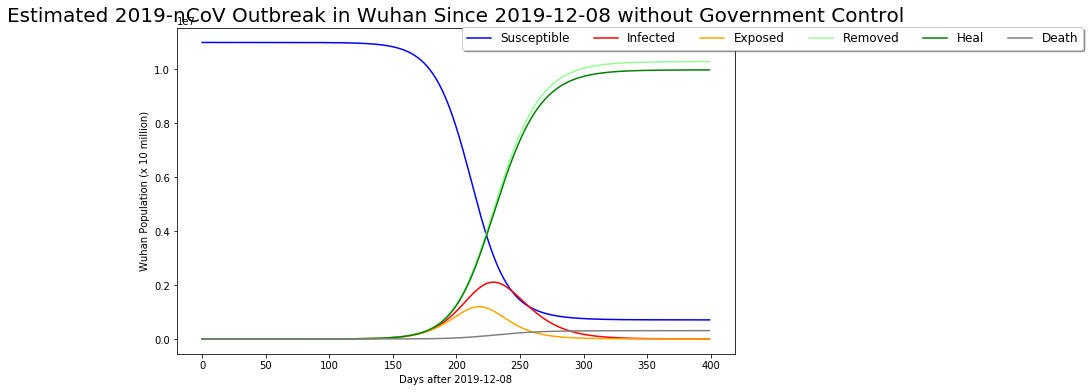

In [3]:
"""
Baseline: before 23 Jan 

2019-12-08: 
I0 = 1: 1confirmed cases
E0 = 5: Based on the data in Early Transmission Dynamics report, there are 5 cases were confirmed 
in the next 7 days after the first case. So E0 = 5. 
R0 = 0: no people died or recover
"""

baseline = Estimate_Wuhan_Outbreak(Est, k = 5, N=11000000,
                E0 = 5, I0 = 1, R0 = 0, T=7, econ = 400)
result = baseline._run_SIER('Estimated 2019-nCoV Outbreak in Wuhan Since 2019-12-08 without Government Control',
        'Wuhan Population (x 10 million)', 'Days after 2019-12-08', death_rate = 0.03)

Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  3640631


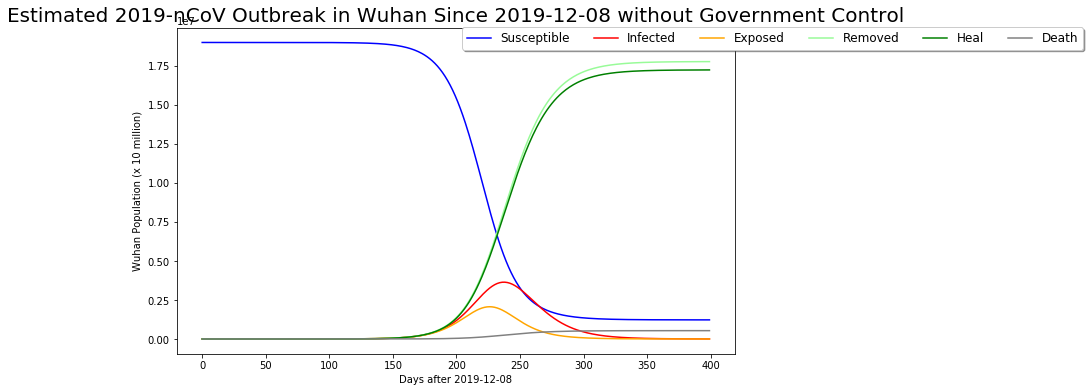

In [4]:
"""
S0 = N = 19000000: 
Considering the effective catchment population of Wuhan
"""

more_ppl = Estimate_Wuhan_Outbreak(Est, k = 5, N=19000000,
                E0 = 5, I0 = 1, R0 = 0, T=7, econ = 400)
result2 = more_ppl._run_SIER('Estimated 2019-nCoV Outbreak in Wuhan Since 2019-12-08 without Government Control',
                             'Wuhan Population (x 10 million)', 'Days after 2019-12-08', death_rate = 0.03)

## After 23 Jan
1. N = 9000000: official report the number of people stayed in Wuhan
2. The case after Wuhan shut down (after 23 Jan):
   - k = 1: high conscuousness of 2019-nCoV
   

Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  14219


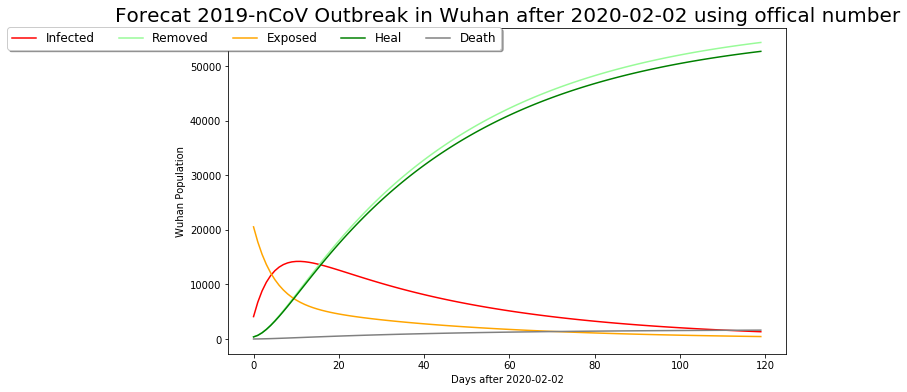

In [5]:
"""
after Wuhan shut down (after 23 Jan)
beta: The contact rate is half than before
N = 9000000
k = 1 # effective goverment control and individual protection

2020 Feb 02:
R0 = 175+224. curedCount: 175, deadCount: 224
I0 = 4109 # offical number on 02 Feb

Suppose E0 = I0*5: the number of ppl in incubation is 5 times the confirmed cases.
"""
#past_days = 47 # the number of past days after 2019-12-08
case1 = Estimate_Wuhan_Outbreak(Est, k = 1, N=9000000,
                E0 = 4109 * 5, I0 = 4109, R0 = (175+224), T=7, econ = 120)
result2 = case1._run_SIER('Forecat 2019-nCoV Outbreak in Wuhan after 2020-02-02 using offical number',
        'Wuhan Population','Days after 2020-02-02', death_rate = 0.03, show_Sus = False)

### Sensitivity Analysis

Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  22230


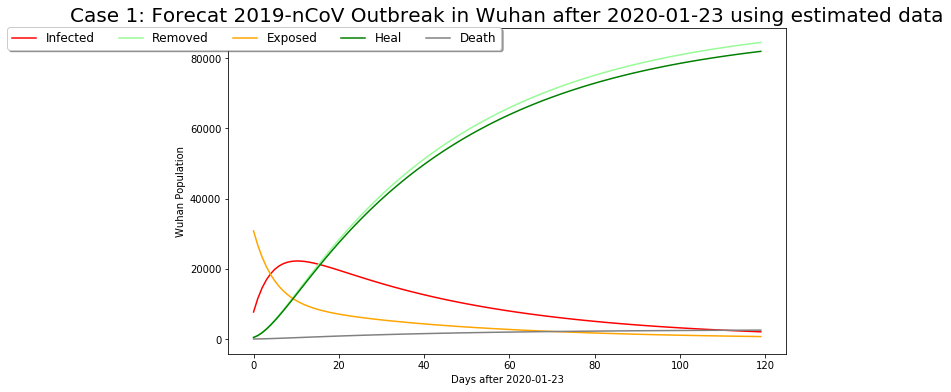

In [6]:
"""
case 1:
S0 using the estimated result from model 1
There are 46000 cases in wuhan until 23 Jan:
   Assume the infected case are 20% only
   The lefs are in incubation period
Assume the death rate = cure rate = 3% 
"""
N = 9000000
I0 = 38500 *1/5
E0 = 38500 * 4/5
R0 = I0 * (0.03+0.03) # suppose the death rate is 3% (official), equal to cure rate
k = 1
# estimate beta and R0
Est_beta = Est._estimate_transmission_probablity()*k

case2 = Estimate_Wuhan_Outbreak(Est, k = 1, N=9000000,
                E0 = E0, I0 = I0, R0 = R0, T=7, econ = 120)
result3 = case2._run_SIER('Case 1: Forecat 2019-nCoV Outbreak in Wuhan after 2020-01-23 using estimated data',
        'Wuhan Population','Days after 2020-01-23', death_rate = 0.03, show_Sus = False)


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 3.7

Maximum infected case:  16524


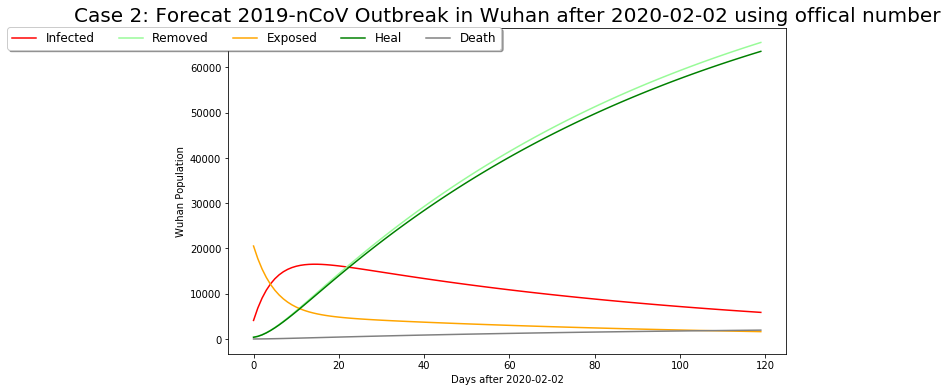

In [15]:
"""
case2: Assume the mean duration of the infection is 30 days
"""

Est = Estimate_parameter(nu = 1/20, k = 5, t = t, I = I)

Est_beta = Est._estimate_transmission_probablity()*k

case2 = Estimate_Wuhan_Outbreak(Est, k = 1, N=9000000,
                E0 = 4109 * 5, I0 = 4109, R0 = (175+224), T=7, econ = 120)
result3 = case2._run_SIER('Case 2: Forecat 2019-nCoV Outbreak in Wuhan after 2020-02-02 using offical number',
        'Wuhan Population','Days after 2020-02-02', show_Sus = False, death_rate = 0.03)


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 3.7

Maximum infected case:  101156


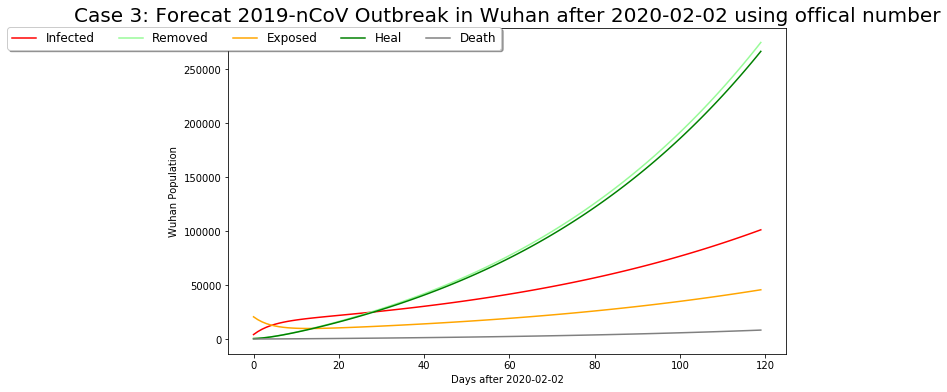

In [8]:
"""
case3: Assume k = 2, rather than 1, 
         since some cases cannot be detected correctly or immediately, Also not perfect isolation
"""

Est = Estimate_parameter(nu = 1/20, k = 5, t = t, I = I)

Est_beta = Est._estimate_transmission_probablity()*k

case2 = Estimate_Wuhan_Outbreak(Est, k = 2, N=9000000,
                E0 = 4109 * 5, I0 = 4109, R0 = (175+224), T=7, econ = 120)
result3 = case2._run_SIER('Case 3: Forecat 2019-nCoV Outbreak in Wuhan after 2020-02-02 using offical number',
        'Wuhan Population','Days after 2020-02-02', show_Sus = False, death_rate = 0.03)


Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 3.7

Maximum infected case:  25812


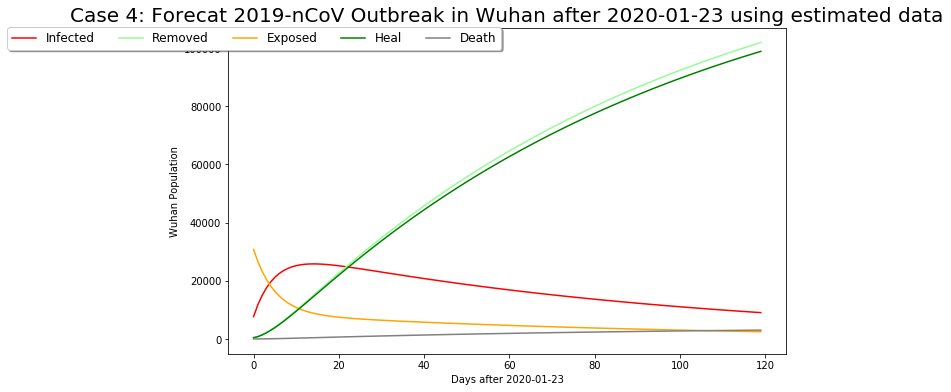

In [13]:
"""
case4: case 1 + case 2
"""

Est = Estimate_parameter(nu = 1/20, k = 5, t = t, I = I)

N = 9000000
I0 = 38500 *1/5
E0 = 38500 * 4/5
R0 = I0 * (0.03+0.03) # suppose the death rate is 3% (official), equal to cure rate
k = 1
# estimate beta and R0
Est_beta = Est._estimate_transmission_probablity()*k

case2 = Estimate_Wuhan_Outbreak(Est, k = 1, N=9000000,
                E0 = E0, I0 = I0, R0 = R0, T=7, econ = 120)
result3 = case2._run_SIER('Case 4: Forecat 2019-nCoV Outbreak in Wuhan after 2020-01-23 using estimated data',
        'Wuhan Population','Days after 2020-01-23', show_Sus = False, death_rate = 0.03,)



Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 3.7

Maximum infected case:  150900


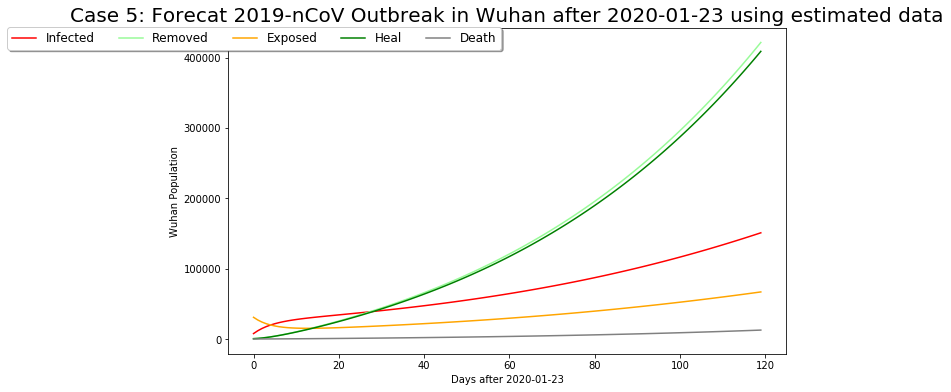

In [12]:
"""
case5: case 1 + case 2 + case 3
"""

Est = Estimate_parameter(nu = 1/20, k = 5, t = t, I = I)

N = 9000000
I0 = 38500 *1/5
E0 = 38500 * 4/5
R0 = I0 * (0.03+0.03) # suppose the death rate is 3% (official), equal to cure rate
k = 1
# estimate beta and R0
Est_beta = Est._estimate_transmission_probablity()*k

case2 = Estimate_Wuhan_Outbreak(Est, k = 2, N=9000000,
                E0 = E0, I0 = I0, R0 = R0, T=7, econ = 120)
result3 = case2._run_SIER('Case 5: Forecat 2019-nCoV Outbreak in Wuhan after 2020-01-23 using estimated data',
        'Wuhan Population','Days after 2020-01-23', show_Sus = False, death_rate = 0.03,)



### SIR model

Estimate the transmission probablity: 0.04 
Estimated R0(basic reproduction number): 2.9

Maximum infected case:  3243932


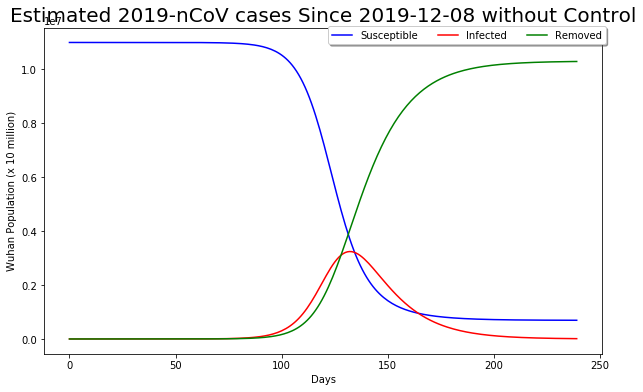

In [11]:
# 湖北航天医院医师胡电波的话说(1月底)，汇总后统计发烧人群为10万人
"""
Baseline SIR model: before 23 Jan 
"""
nu = 1/14
k = 5
S0 = N = 11000000

# estimate beta and R0
Est = Estimate_parameter(nu = nu, k = k, t = t, I = I)
print(Est)

# run SIR model
sir = SIR(eons=240, Susceptible=N-1, Infected=1, Resistant=0, 
          rateSI=Est.beta, rateIR=nu)
result = sir.run()
sir.plot('Estimated 2019-nCoV cases Since 2019-12-08 without Control',
        'Wuhan Population (x 10 million)')